In [1]:
import tensorflow as tf
from KyleNet import KyleNet
from pathlib import Path

# Get the metadata
META = Path(".").resolve().parent.joinpath("metadata.csv")

c:\users\kyle\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\kyle\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\users\kyle\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


##### Check if the experiment is using the CPU or GPU version of TF

In [2]:
if tf.test.gpu_device_name():
    print(f"GPU Device: {tf.test.gpu_device_name()}\n")
else:
    print("Running off of CPU\n")

GPU Device: /device:GPU:0



## Experiment 1.
##### This experiment is to gauge the baseline performance of the model before future improvements are made.
##### Hyperparameters for this experiment are set using the KyleNet default values of:
- 20 Epochs
- 128 Batch size
- 1e-4 Learning rate

##### Call the KyleNet class

In [3]:
baseline = KyleNet(META, "Experiment 1")

Found 70966 validated image filenames belonging to 2 classes.
Found 23655 validated image filenames belonging to 2 classes.


##### View the model summary

In [4]:
baseline.Summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 220, 220, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 108, 108, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

##### Train the model and view the accuracy/loss graphs

Epoch 1/20
554/554 [==============================] - 379s 683ms/step - loss: 0.1019 - accuracy: 0.9745 - val_loss: 0.0898 - val_accuracy: 0.9631

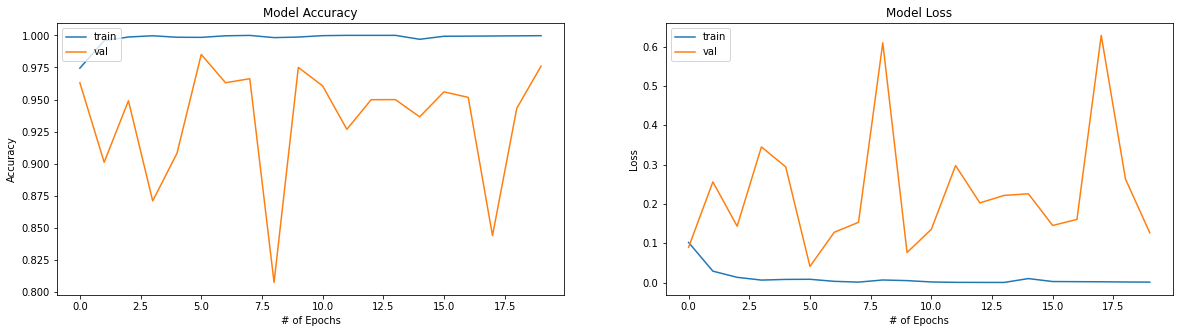

In [5]:
baseline.Train()
baseline.PlotHistory()

##### Evaluate the models performance

In [6]:
baseline.Evaluate()

185/185 [==============================] - 81s 438ms/step - loss: 0.1260 - accuracy: 0.9762

##### Get the predictions so that the classifications can be viewed and analyzed

In [7]:
baseline.Predict()

185/185 [==============================] - 79s 429ms/step

In [8]:
baseline.MetricReport()

              precision    recall  f1-score   support

    COVID-19       1.00      0.98      0.99     23638
   NON-COVID       0.02      0.82      0.05        17

    accuracy                           0.98     23655
   macro avg       0.51      0.90      0.52     23655
weighted avg       1.00      0.98      0.99     23655



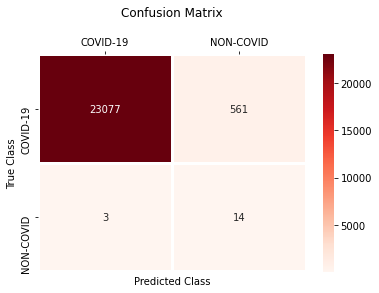

In [9]:
baseline.ConfusionMatrix()

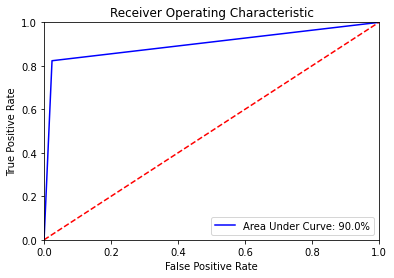

In [10]:
baseline.ROC()

In [11]:
baseline.Save()